https://blog.paperspace.com/autoencoder-image-compression-keras/

In [31]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot
import pickle
import os

In [2]:
# RMSE
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict))

In [21]:
class Decoder:
    def __init__(self, hidden_size, encoding_size, lr=0.0005):
        img_dim = 784
        # Encoder
        x = tensorflow.keras.layers.Input(shape=(encoding_size), name="encoder_input")
        self.encoder = tensorflow.keras.models.Model(x, x, name="encoder_model")

        # Decoder
        decoder_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="decoder_input")

        decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="decoder_dense_1")(decoder_input)
        decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

        decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=img_dim, name="decoder_dense_2")(decoder_activ_layer1)
        decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

        self.decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
        # try soft-max, tanh

        # Autoencoder
        ae_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="AE_input")
        ae_encoder_output = self.encoder(ae_input)
        ae_decoder_output = self.decoder(ae_encoder_output)

        self.ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

        # AE Compilation
        self.ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr))

    def predict(self, x):
        encoded_images = self.encoder.predict(x)
        decoded_images = self.decoder.predict(encoded_images)
        return decoded_images

In [36]:
# init model
encoding_size = 16
hidden_size = 784
model = Decoder(hidden_size, encoding_size)

In [37]:
# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

test_size = 10

y_train_bin = numpy.zeros(shape = (y_train.shape[0], encoding_size))
for label_idx, label in enumerate(y_train):
    temp_bin = [int(x) for x in bin(label_idx)[2:]]
    temp_bin = [0 for _ in range(encoding_size - len(temp_bin))] + temp_bin
    for digit_idx, digit in enumerate(y_train_bin[label_idx]):
        y_train_bin[label_idx][digit_idx] = temp_bin[digit_idx]
y_train_bin = y_train_bin[:test_size]

x_train_reduced = x_train[:test_size]

In [39]:
# Training AE
model.ae.fit(y_train_bin, x_train_reduced, epochs=500, batch_size=32, shuffle=True, validation_data=(y_train_bin, x_train_reduced))

Epoch 1/500
1/1 [==============================] - 0s 71ms/step - loss: 0.0252 - val_loss: 0.0250
Epoch 2/500
1/1 [==============================] - 0s 36ms/step - loss: 0.0250 - val_loss: 0.0248
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 0.0248 - val_loss: 0.0247
Epoch 4/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0247 - val_loss: 0.0245
Epoch 5/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0245 - val_loss: 0.0243
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0243 - val_loss: 0.0241
Epoch 7/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0241 - val_loss: 0.0239
Epoch 8/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0239 - val_loss: 0.0238
Epoch 9/500
1/1 [==============================] - 0s 25ms/step - loss: 0.0238 - val_loss: 0.0236
Epoch 10/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 11/500
1/1 [=

1/1 [==============================] - 0s 36ms/step


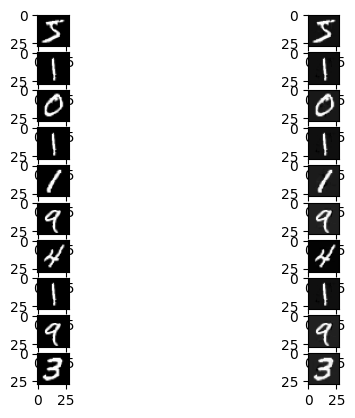

In [40]:
decoded_images = model.predict(y_train_bin)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))
x_train_reduced = numpy.reshape(x_train_reduced, newshape=(x_train_reduced.shape[0], 28, 28))

num_images_to_show = 10
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train_reduced.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_reduced[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

In [26]:
# init model
encoding_size = 16
hidden_size = 784
model = Decoder(hidden_size, encoding_size)

In [27]:
# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

test_size = 1000

y_train_bin = numpy.zeros(shape = (y_train.shape[0], encoding_size))
for label_idx, label in enumerate(y_train):
    temp_bin = [int(x) for x in bin(label_idx)[2:]]
    temp_bin = [0 for _ in range(encoding_size - len(temp_bin))] + temp_bin
    for digit_idx, digit in enumerate(y_train_bin[label_idx]):
        y_train_bin[label_idx][digit_idx] = temp_bin[digit_idx]
y_train_bin = y_train_bin[:test_size]

x_train_reduced = x_train[:test_size]

In [28]:
# Training AE
model.ae.fit(y_train_bin, x_train_reduced, epochs=1000, batch_size=32, shuffle=True, validation_data=(y_train_bin, x_train_reduced))
# look at batch size, training full dataset

Epoch 1/1000
32/32 [==============================] - 1s 12ms/step - loss: 0.0785 - val_loss: 0.0676
Epoch 2/1000
32/32 [==============================] - 0s 11ms/step - loss: 0.0665 - val_loss: 0.0652
Epoch 3/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0651 - val_loss: 0.0643
Epoch 4/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0644 - val_loss: 0.0639
Epoch 5/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0640 - val_loss: 0.0635
Epoch 6/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0637 - val_loss: 0.0631
Epoch 7/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0634 - val_loss: 0.0630
Epoch 8/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0632 - val_loss: 0.0627
Epoch 9/1000
32/32 [==============================] - 0s 9ms/step - loss: 0.0630 - val_loss: 0.0625
Epoch 10/1000
32/32 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0

32/32 [==============================] - 0s 2ms/step


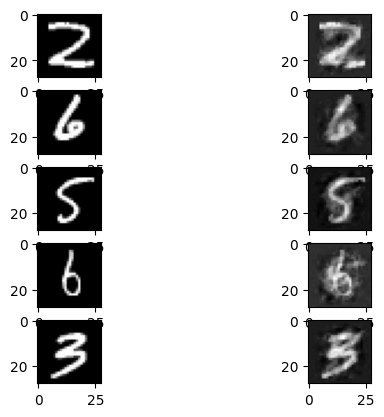

In [29]:
decoded_images = model.predict(y_train_bin)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))
x_train_reduced = numpy.reshape(x_train_reduced, newshape=(x_train_reduced.shape[0], 28, 28))

num_images_to_show = int(5)
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train_reduced.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_reduced[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

In [33]:
with open(os.path.join('../pickle/', '1000img.pickle'), 'wb') as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\input_layer
......vars
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-30 22:34:16          467
metadata.json                                  2023-01-30 22:34:16           64
variables.h5                                   2023-01-30 22:34:16         3568
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\input_layer
......vars
...layers\leaky_re_lu
......vars
...layers\leaky_re_lu_1
......vars
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-01-30 22:34:17         1936
metadata.json                                  2023-01-30 22:34:17           64
va

In [34]:
with open(os.path.join('../pickle/', '1000img.pickle'), 'rb') as f:
    model = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-30 22:34:16          467
metadata.json                                  2023-01-30 22:34:16           64
variables.h5                                   2023-01-30 22:34:16         3568
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\input_layer
......vars
...vars
Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-30 22:34:16         1936
metadata.json                                  2023-01-30 22:34:16           64
variables.h5                                   2023-01-30 22:34:16      2527488
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\input_layer
......v

32/32 [==============================] - 0s 2ms/step


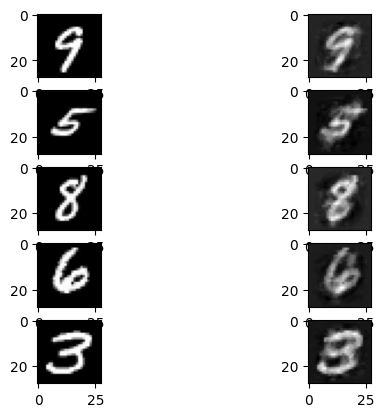

In [35]:
decoded_images = model.predict(y_train_bin)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))
x_train_reduced = numpy.reshape(x_train_reduced, newshape=(x_train_reduced.shape[0], 28, 28))

num_images_to_show = int(5)
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train_reduced.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_reduced[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

#### Basic Autoencoder

In [7]:
class Autoencoder:
    def __init__(self, hidden_size, encoding_size, lr=0.0005):
        img_dim = 784
        # Encoder
        x = tensorflow.keras.layers.Input(shape=(img_dim), name="encoder_input")

        encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="encoder_dense_1")(x)
        encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

        encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=encoding_size, name="encoder_dense_2")(encoder_activ_layer1)
        encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_dense_layer2)

        self.encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

        # Decoder
        decoder_input = tensorflow.keras.layers.Input(shape=(encoding_size), name="decoder_input")

        decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=hidden_size, name="decoder_dense_1")(decoder_input)
        decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

        decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=img_dim, name="decoder_dense_2")(decoder_activ_layer1)
        decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_dense_layer2)

        self.decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

        # Autoencoder
        ae_input = tensorflow.keras.layers.Input(shape=(img_dim), name="AE_input")
        ae_encoder_output = self.encoder(ae_input)
        ae_decoder_output = self.decoder(ae_encoder_output)

        self.ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")

        # AE Compilation
        self.ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=lr))

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0599 - val_loss: 0.0563
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0555 - val_loss: 0.0543
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0537 - val_loss: 0.0527
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0527 - val_loss: 0.0518
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0517 - val_loss: 0.0509
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0507 - val_loss: 0.0497
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0496 - val_loss: 0.0488
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0488 - val_loss: 0.0481
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0481 - val_loss: 0.0476
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0476 - val_loss: 0.0474

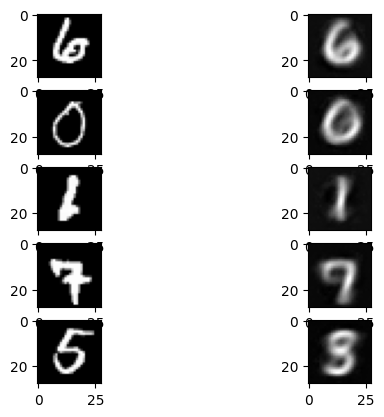

In [8]:
# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

# init an autoencoder
hidden_size = 300
encoding_size = 2
model = Autoencoder(hidden_size, encoding_size)

# Training AE
model.ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_images = model.encoder.predict(x_train)
decoded_images = model.decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")